## An Algorithm for Finding the Chebyshev Center of a Convex Polyhedron

1. Formulation of the Problem. Optimality Conditions
Let $Z=\left\{z_{1}, z_{2}, \ldots, z_{m}\right\}$ be a finite set of points in the Euclidean space $R^{n} .$ A point $x_{*} \in R^{n}$ is called Chebyshev center of the set $Z,$ if
$$
\max _{z \in Z}\left\|x_{*}-z\right\|=\min _{x \in R^{n}} \max _{z \in Z}\|x-z\|
$$
It is easily seen that the point $x_{*}$ satisfying relation (1) is unique and $x_{*} \in \operatorname{co} Z$, where symbol "co" means the convex hull of a set. For any point $x \in R^{n}$ we denote
$$
d_{\max }(x)=\max _{z \in Z}\|x-z\| .
$$
Let symbol $E(x)$ denote the subset of points of $Z$ which have the largest distance from $x,$ i.e.
$$
E(x)=\left\{z \in Z:\|x-z\|=d_{\max }(x)\right\}
$$
The optimality conditions are given by the following theorem [2].
Theorem 1. A point $x_{*} \in R^{n}$ is the Chebyshev center of $Z$ iff $x_{*} \in \operatorname{co} E\left(x_{*}\right) .$
This fact will be used as a criterion of the algorithm termination.


2. The Idea of the Algorithm
Choose an initial point $x_{0} \in \operatorname{co} Z$ and find the set $E\left(x_{0}\right)$. Assume that $x_{0} \notin \operatorname{co} E\left(x_{0}\right)$. Otherwise $x_{0}=x_{*}$ Let
$$
J=\left\{j \in \overline{1, m}: z_{j} \in E\left(x_{0}\right)\right\}, \quad I=\left\{i \in \overline{1, m}: z_{i} \in Z \backslash E\left(x_{0}\right)\right\}
$$
Find a point $y_{0} \in \operatorname{co} E\left(x_{0}\right)$ nearest to the point $x_{0} .$ For any $\alpha \in[0,1]$ consider the point $x_{\alpha}=x_{0}+\alpha\left(y_{0}-x_{0}\right)$. Obviously, for $\alpha=0$ the following inequality holds
$$
\max _{j \in J}\left\|x_{\alpha}-z_{j}\right\|-\max _{i \in I}\left\|x_{\alpha}-z_{i}\right\|>0
$$

3. The Algorithm
Algorithm 1 \\
Step 0: Choose an initial point $x_{0} \in \operatorname{coZ}$ and set $k:=0$. \\
Step 1: Find $E\left(x_{k}\right)$. If $E\left(x_{k}\right)=Z,$ then $x_{*}:=x_{k}$ and stop. \\
Step 2: Find $y_{k} \in \operatorname{coE}\left(x_{k}\right)$ as the nearest point to $x_{k}$. If $y_{k}=x_{k},$ then $x_{*}:=x_{k}$ and stop. \\
Step 3: Calculate $\alpha_{k}$ by the formula:
$$
\begin{array}{l}
\alpha_{k}=\min _{i \in I_{k}^{-}} \frac{\left\|z_{i}-x_{k}\right\|^{2}-d_{\max }^{2}\left(x_{k}\right)}{2\left\langle y_{k}-x_{k}, z_{i}-y_{k}\right\rangle} \\
I_{k}^{-}=\left\{i: z_{i} \in Z \backslash E\left(x_{k}\right),\left\langle y_{k}-x_{k}, z_{i}-y_{k}\right\rangle<0\right\}
\end{array}
$$
$\left(\right.$ we set formally $\alpha_{k}=+\infty$ whenever $\left.I_{k}^{-}=\emptyset\right) .$ If $\alpha_{k} \geq 1,$ then $x_{*}:=y_{k}$ and stop. \\
Step 4: Let
$$
x_{k+1}:=x_{k}+\alpha_{k}\left(y_{k}-x_{k}\right), k:=k+1
$$
and go to Step $1 .$
emark. Note that Algorithm 1 comprises the non-trivial operation of finding the distance to convex hull of the point set (Step 2). In our latest program realizing Algorithm 1 we used the recursive algorithm of [3] for the implementation of this operation. However, we will see below that the point $y_{k}$ of Step 2 is the Chebyshev center of $E\left(x_{k}\right)$. So we come to the following recursive algorithm.

In [ ]:
from math import log, pi
from cvxopt import blas, lapack, solvers
from cvxopt import matrix, spdiag, sqrt, mul, cos, sin, log
from cvxopt.modeling import variable, op 
solvers.options['show_progress'] = False

In [ ]:
# Extreme points (with first one appended at the end)
X = matrix([ 0.55,  0.25, -0.20, -0.25,  0.00,  0.40,  0.55,  
             0.00,  0.35,  0.20, -0.10, -0.30, -0.20,  0.00 ], (7,2))
m = X.size[0] - 1

# Inequality description G*x <= h with h = 1
G, h = matrix(0.0, (m,2)), matrix(0.0, (m,1))
G = (X[:m,:] - X[1:,:]) * matrix([0., -1., 1., 0.], (2,2))
h = (G * X.T)[::m+1]
G = mul(h[:,[0,0]]**-1, G)
h = matrix(1.0, (m,1))


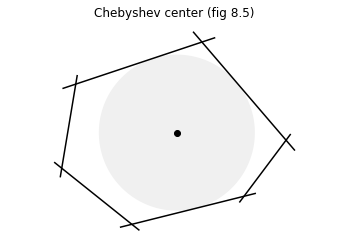

In [ ]:
# Chebyshev center
#
# maximizse   R 
# subject to  gk'*xc + R*||gk||_2 <= hk,  k=1,...,m
#             R >= 0

try: import pylab
except ImportError: pylab_installed = False
else: pylab_installed = True

R = variable()
xc = variable(2)
op(-R, [ G[k,:]*xc + R*blas.nrm2(G[k,:]) <= h[k] for k in range(m) ] + 
    [ R >= 0] ).solve()
R = R.value    
xc = xc.value    

if pylab_installed:
    pylab.figure(1, facecolor='w')

    # polyhedron
    for k in range(m):
        edge = X[[k,k+1],:] + 0.1 * matrix([1., 0., 0., -1.], (2,2)) * \
            (X[2*[k],:] - X[2*[k+1],:])
        pylab.plot(edge[:,0], edge[:,1], 'k')


    # 1000 points on the unit circle
    nopts = 1000
    angles = matrix( [ a*2.0*pi/nopts for a in range(nopts) ], (1,nopts) )
    circle = matrix(0.0, (2,nopts))
    circle[0,:], circle[1,:] = R*cos(angles), R*sin(angles)
    circle += xc[:,nopts*[0]]
    
    # plot maximum inscribed disk
    pylab.fill(circle[0,:].T, circle[1,:].T, facecolor = '#F0F0F0')
    pylab.plot([xc[0]], [xc[1]], 'ko')
    pylab.title('Chebyshev center (fig 8.5)')
    pylab.axis('equal')
    pylab.axis('off')

In [ ]:
# Maximum volume enclosed ellipsoid center
#
# minimize    -log det B
# subject to  ||B * gk||_2 + gk'*c <= hk,  k=1,...,m
#
# with variables  B and c.
#
# minimize    -log det L
# subject to  ||L' * gk||_2^2 / (hk - gk'*c) <= hk - gk'*c,  k=1,...,m
#
# L lower triangular with positive diagonal and B*B = L*L'.
#
# minimize    -log x[0] - log x[2]
# subject to   g( Dk*x + dk ) <= 0,  k=1,...,m
#
# g(u,t) = u'*u/t - t 
# Dk = [ G[k,0]   G[k,1]  0       0        0 
#        0        0       G[k,1]  0        0 
#        0        0       0      -G[k,0]  -G[k,1] ] 
# dk = [0; 0; h[k]] 
#
# 5 variables x = (L[0,0], L[1,0], L[1,1], c[0], c[1])

D = [ matrix(0.0, (3,5)) for k in range(m) ]
for k in range(m):
    D[k][ [0, 3, 7, 11, 14] ] = matrix( [G[k,0], G[k,1], G[k,1], 
        -G[k,0], -G[k,1]] )
d = [matrix([0.0, 0.0, hk]) for hk in h]

def F(x=None, z=None):
    if x is None:  
        return m, matrix([ 1.0, 0.0, 1.0, 0.0, 0.0 ])
    if min(x[0], x[2], min(h-G*x[3:])) <= 0.0:  
        return None

    y = [ Dk*x + dk for Dk, dk in zip(D, d) ]

    f = matrix(0.0, (m+1,1))
    f[0] = -log(x[0]) - log(x[2])
    for k in range(m):  
        f[k+1] = y[k][:2].T * y[k][:2] / y[k][2] - y[k][2]
       
    Df = matrix(0.0, (m+1,5))
    Df[0,0], Df[0,2] = -1.0/x[0], -1.0/x[2]

    # gradient of g is ( 2.0*(u/t);  -(u/t)'*(u/t) -1) 
    for k in range(m):
        a = y[k][:2] / y[k][2]
        gradg = matrix(0.0, (3,1))
        gradg[:2], gradg[2] = 2.0 * a, -a.T*a - 1
        Df[k+1,:] =  gradg.T * D[k]
    if z is None: return f, Df
    
    H = matrix(0.0, (5,5))
    H[0,0] = z[0] / x[0]**2
    H[2,2] = z[0] / x[2]**2

    # Hessian of g is (2.0/t) * [ I, -u/t;  -(u/t)',  (u/t)*(u/t)' ]
    for k in range(m):
        a = y[k][:2] / y[k][2]
        hessg = matrix(0.0, (3,3))
        hessg[0,0], hessg[1,1] = 1.0, 1.0
        hessg[:2,2], hessg[2,:2] = -a,  -a.T
        hessg[2, 2] = a.T*a
        H += (z[k] * 2.0 / y[k][2]) *  D[k].T * hessg * D[k]

    return f, Df, H 
    
sol = solvers.cp(F)
L = matrix([sol['x'][0], sol['x'][1], 0.0, sol['x'][2]], (2,2))
c = matrix([sol['x'][3], sol['x'][4]])

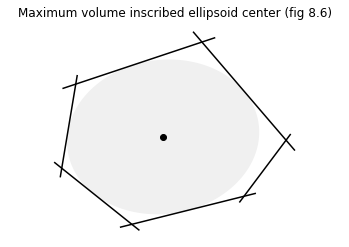

In [ ]:
if pylab_installed:
    pylab.figure(2, facecolor='w')

    # polyhedron
    for k in range(m):
        edge = X[[k,k+1],:] + 0.1 * matrix([1., 0., 0., -1.], (2,2)) * \
            (X[2*[k],:] - X[2*[k+1],:])
        pylab.plot(edge[:,0], edge[:,1], 'k')

    
    # 1000 points on the unit circle
    nopts = 1000
    angles = matrix( [ a*2.0*pi/nopts for a in range(nopts) ], (1,nopts) )
    circle = matrix(0.0, (2,nopts))
    circle[0,:], circle[1,:] = cos(angles), sin(angles)
    
    # ellipse = L * circle + c
    ellipse = L * circle + c[:, nopts*[0]]
    
    pylab.fill(ellipse[0,:].T, ellipse[1,:].T, facecolor = '#F0F0F0')
    pylab.plot([c[0]], [c[1]], 'ko')
    pylab.title('Maximum volume inscribed ellipsoid center (fig 8.6)')
    pylab.axis('equal')
    pylab.axis('off')

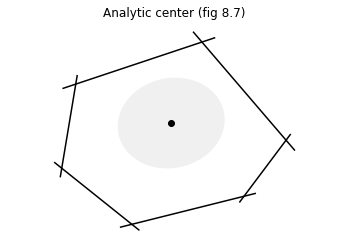

In [ ]:
# Analytic center.
#
# minimize  -sum log (h-G*x)
#

def F(x=None, z=None):
    if x is None: return 0, matrix(0.0, (2,1))
    y = h-G*x
    if min(y) <= 0: return None
    f = -sum(log(y))
    Df = (y**-1).T * G
    if z is None: return matrix(f), Df
    H =  G.T * spdiag(y**-1) * G
    return matrix(f), Df, z[0]*H

sol = solvers.cp(F)
xac = sol['x']
Hac = G.T * spdiag((h-G*xac)**-1) * G

if pylab_installed:
    pylab.figure(3, facecolor='w')

    # polyhedron
    for k in range(m):
        edge = X[[k,k+1],:] + 0.1 * matrix([1., 0., 0., -1.], (2,2)) * \
            (X[2*[k],:] - X[2*[k+1],:])
        pylab.plot(edge[:,0], edge[:,1], 'k')
    
    
    # 1000 points on the unit circle
    nopts = 1000
    angles = matrix( [ a*2.0*pi/nopts for a in range(nopts) ], (1,nopts) )
    circle = matrix(0.0, (2,nopts))
    circle[0,:], circle[1,:] = cos(angles), sin(angles)
    
    # ellipse = L^-T * circle + xc  where Hac = L*L'
    lapack.potrf(Hac)
    ellipse = +circle
    blas.trsm(Hac, ellipse, transA='T')
    ellipse += xac[:, nopts*[0]]
    pylab.fill(ellipse[0,:].T, ellipse[1,:].T, facecolor = '#F0F0F0')
    pylab.plot([xac[0]], [xac[1]], 'ko')
    
    pylab.title('Analytic center (fig 8.7)')
    pylab.axis('equal')
    pylab.axis('off')
    pylab.show()

References
1. Goldbach R. (1992) Inkugel und Umkugel konvexer Polyeder. Diplomarbeit, Institut für Angewandte Mathematik und Statistik Julius-Maximilians- Universität Würzburg.
2. Pschenichny B.N. (1980) Convex analysis and extremal problems, Nauka, Moscow.
3. Sekitani K., Yamamoto Y. (1991) A recursive algorithm for finding the minimum norm point in a polytope and a pair of closest points in two polytopes, Sci. report No.462, Institute of Socio-Economic Planning, University of Tsukuba, Japan.
4. Welzl E. (1991) Smallest enclosing disks (balls and ellipsoids). Lecture Notes in Computer Science, Springer-Verlag, New York $555: 359-370 .$